# LINEAR REGRESSION 

In [ ]:
'''Finding Best fit line : Line that passes the middle of the data points.
    Linear Regression Types =>
        -> Simple Linear Regression : One Input Feature
        -> Multiple Linear Regression : more then 1 input feature '''

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
californina = fetch_california_housing()
data = pd.DataFrame(californina.data, columns = californina.feature_names)
data["MEDV"] = californina.target

In [6]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
# checking any null value in data
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

In [9]:
# dividing the data into traing data and testing data => 

from sklearn.model_selection import train_test_split
x = data.drop("MEDV", axis = 1)
y = data["MEDV"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # by default hyper parameter used  
model.fit(x_train, y_train)  # model get trained over x_trained and y_trained data
prediction = model.predict(x_test)  # model made predictin on test data too



'''About Hyper Parameters => 

model = LinearRegression(
    fit_intercept = True,  # include B0 intercept in model
    copy_x = True,         # make a copy of input features and make model over it
    n_jobs = -1            # use all cpu cores for computation
    
)'''

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"r^2 Error: {r2}")

Mean Absolute Error: 0.533200130495657
Mean Squared Error: 0.5558915986952437
r^2 Error: 0.5757877060324512


# ASSUMPTIONS OF LINEAR REGRESSION

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load the data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year","origin", "car_name"]
data = pd.read_csv(url, names=column_names, delim_whitespace = True, na_values ="?")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [14]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [15]:
data.dropna(inplace = True)

## 1. Linearity

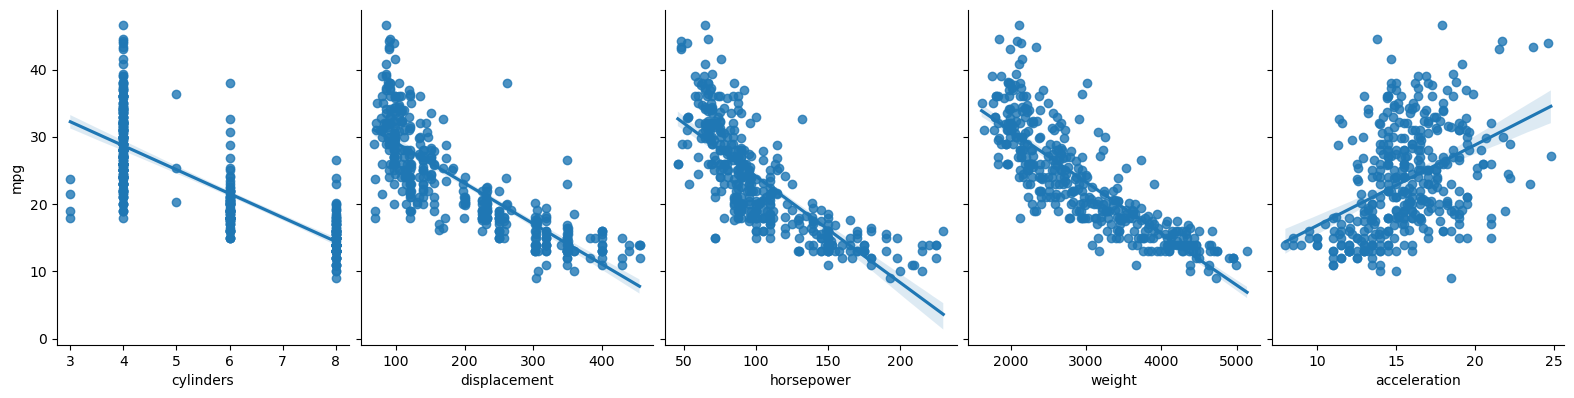

In [17]:
sns.pairplot(data, x_vars = ["cylinders", "displacement", "horsepower", "weight", "acceleration"], y_vars = "mpg", height = 4, aspect = 0.8, kind = "reg")
plt.show()

## 2. Independence of Error

In [19]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

# define the predictors and target variable
x = data[["cylinders", "displacement", "horsepower", "weight", "acceleration"]]
y = data["mpg"]

# add a constant to the predictors
x = sm.add_constant(x)

#fit the model
model = sm.OLS(y,x).fit()
residuals = model.resid

#durbin- watson test
dw_stat = durbin_watson(residuals)
dw_stat

0.8651526966463919

- Values close to 0 : Strong Positive AutoCorrelation, don't follow independence of errors
- Values close to 2 : No AutoCorrelation, Follow Independence of Errors    
- Values close to 4 : Strong Negative AutoCorrelation, Don't follow independence of errors    

## 3. Homoscedasticity

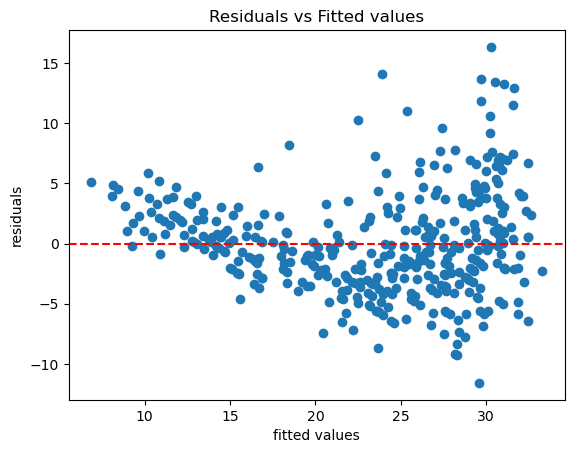

In [22]:
# Residuals Plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color="r", linestyle = "--")
plt.title("Residuals vs Fitted values")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

- Homodasecity : If points are scattered randomly and dont follow a pattern

## 4. Normality of Errors

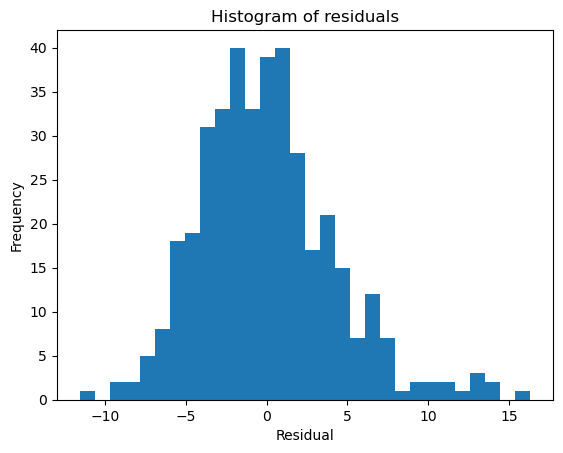

In [24]:
plt.hist(model.resid, bins =30)
plt.title("Histogram of residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

## 5. No Multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,const,154.860110
1,cylinders,10.630870
2,displacement,19.535061
3,horsepower,8.916017
4,weight,10.430271
5,acceleration,2.609487


- Value above 10: High Multicollinearity

## When to use Linear Regression

- Continious target feature
- lineat data
- independence of errors
- homoscedacity
- no multicollinearity

## When not to use

- Cateforical taarget column
- non - linear data
- data with outliers
- time series data(due to autocorrelation)